In [1]:
# What drives happiness?
# What are the factors that influence suicide rate?

# import dependencies
from config import census_key
import requests
from pprint import pprint
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [66]:
# Get census data using api

vars_full = {
    'B19001_001E': 'Household income',
#     'B19083_001E': 'GINI INDEX OF INCOME INEQUALITY',
#     'B19202_001E': 'MEDIAN NONFAMILY HOUSEHOLD INCOME',
    'B15001_044E': 'Estimate!!Total!!Female!!18 to 24 years',
    'B15001_003E': 'Estimate!!Total!!Male!!18 to 24 years',
    'B15001_046E': 'Estimate!!Total!!Female!!18 to 24 years!!9th to 12th grade no diploma',
    'B15001_005E': 'Estimate!!Total!!Male!!18 to 24 years!!9th to 12th grade no diploma',
#
    'B23001_048E': 'Estimate!!Total!!Male!!45 to 54 years!!In labor force!!Civilian',
    'B23001_050E': 'Estimate!!Total!!Male!!45 to 54 years!!In labor force!!Civilian!!Unemployed',
#
    'B27001_018E': 'Estimate!!Total!!Male!!45 to 54 years',
    'B27001_020E': 'Estimate!!Total!!Male!!45 to 54 years!!No health insurance coverage',
#
    'B17001A_001E': 'Estimate!!Total, whites',
    'B17001A_002E': 'Estimate!!Total!!Income in the past 12 months below poverty level, whites',
#
    'B21001_004E': 'Estimate!!Total!!Male',
    'B21001_005E': 'Estimate!!Total!!Male!!Veteran',
#
    'B01003_001E': 'Total population'
}
vars = list(vars_full.keys())

In [67]:
url_start = 'https://api.census.gov/data/2017/acs/acs5?get='
url_mid = 'NAME,' + ','.join(vars)
url_end = '&for=county:*&key='
url = url_start + url_mid + url_end + census_key
response = requests.get(url)

In [68]:
df = pd.DataFrame(response.json()[1:], columns=response.json()[0])
county_code = df['state'] + df['county']
county_code = [code.lstrip('0') for code in county_code]
df['County Code'] = county_code
df = df.set_index('County Code')

# # Find Yolo County. Codes here: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
# df.loc[(df['state'] == '06') & (df['county'] == '113')]

In [69]:
# Import suicide rates csv
path_csv = 'suicide_rates.csv'
df_grim = pd.read_csv(path_csv)
# convert county code column to string
df_grim['County Code'] = df_grim['County Code'].astype(str)
df_grim = df_grim.set_index('County Code')
# Calculate suicide rate per 100k
df_grim['Suicide Rate'] = df_grim['Deaths'] / df_grim['Population'] *100000 

In [77]:
# Join census and suicide dataframes
df_full = df.join(df_grim, on='County Code', how='inner')

# convert numerical columns into float
for thisVar in vars:
    df_full[thisVar] = [float(i) for i in df_full[thisVar]]
    
# Order by highest suicide rate
df_full = df_full.sort_values(by='Suicide Rate', ascending=False)

df_full.head(30)

,NAME,B19001_001E,B15001_044E,B15001_003E,B15001_046E,B15001_005E,B23001_048E,B23001_050E,B27001_018E,B27001_020E,...,B17001A_002E,B21001_004E,B21001_005E,B01003_001E,state,county,County,Deaths,Population,Suicide Rate
County Code,,,,,,,,,,,,,,,,,,,,,
2180,"Nome Census Area, Alaska",2897.0,472.0,552.0,55.0,119.0,482.0,83.0,608.0,241.0,...,86.0,3464.0,408.0,9869.0,02,180,"Nome Census Area, AK",34,49393,68.835665
38085,"Sioux County, North Dakota",1114.0,223.0,228.0,77.0,90.0,148.0,21.0,258.0,90.0,...,108.0,1369.0,148.0,4420.0,38,085,"Sioux County, ND",14,22067,63.443150
2290,"Yukon-Koyukuk Census Area, Alaska",1959.0,219.0,262.0,51.0,50.0,273.0,55.0,343.0,175.0,...,171.0,2140.0,292.0,5453.0,02,290,"Yukon-Koyukuk Census Area, AK",16,27666,57.832719
8027,"Custer County, Colorado",2093.0,112.0,153.0,13.0,18.0,156.0,46.0,211.0,74.0,...,619.0,1922.0,696.0,4505.0,08,027,"Custer County, CO",13,22567,57.606239
46031,"Corson County, South Dakota",1239.0,203.0,189.0,83.0,84.0,192.0,39.0,254.0,83.0,...,146.0,1361.0,236.0,4177.0,46,031,"Corson County, SD",12,20929,57.336710
41015,"Curry County, Oregon",10382.0,481.0,640.0,89.0,218.0,899.0,82.0,1270.0,159.0,...,3178.0,9118.0,2717.0,22377.0,41,015,"Curry County, OR",64,112539,56.869174
46085,"Lyman County, South Dakota",1383.0,151.0,194.0,55.0,36.0,178.0,3.0,208.0,42.0,...,160.0,1430.0,148.0,3882.0,46,085,"Lyman County, SD",11,19443,56.575631
30061,"Mineral County, Montana",1694.0,142.0,193.0,0.0,21.0,201.0,0.0,258.0,83.0,...,807.0,1749.0,471.0,4194.0,30,061,"Mineral County, MT",12,21222,56.545095
46121,"Todd County, South Dakota",2768.0,523.0,573.0,230.0,241.0,264.0,18.0,440.0,184.0,...,61.0,2876.0,301.0,10016.0,46,121,"Todd County, SD",27,50043,53.953600


Text(0, 0.5, 'Count')

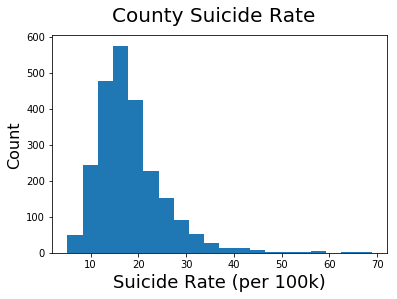

In [71]:
n_bins = 20
fig = plt.figure()
plt.hist(df_full['Suicide Rate'], bins=n_bins)
fig.suptitle('County Suicide Rate', fontsize=20)
plt.xlabel('Suicide Rate (per 100k)', fontsize=18)
plt.ylabel('Count', fontsize=16)

Slope = 33.98870972851766
r-squared = 0.08624282158322398
p-value = 3.3573445632114665e-48


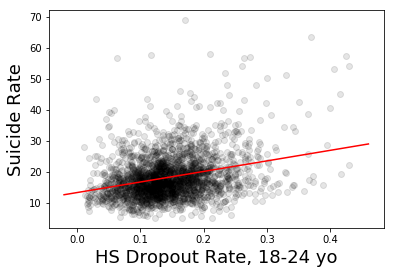

In [72]:
# Define x and y
x = (df_full['B15001_005E'] + df_full['B15001_046E']) / (df_full['B15001_003E'] + df_full['B15001_044E'])
y = df_full['Suicide Rate']

# Plot
fig = plt.scatter(x, y, c='black', alpha=0.1)
axes = plt.gca()
# axes.set_xlim([0,500000])
plt.ylabel('Suicide Rate', fontsize=18)
plt.xlabel('HS Dropout Rate, 18-24 yo', fontsize=18)


# Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Plot a line from slope and intercept
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-', color="red")
print(f"Slope = {slope}")
print(f"r-squared = {r_value**2}")
print(f"p-value = {p_value}")
# plt.savefig("happySauce_fig01.png")

Slope = 48.204113919417445
r-squared = 0.10843890927949427
p-value = 7.492949003446184e-61


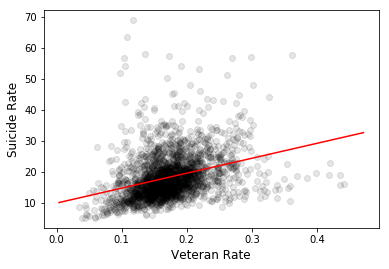

In [75]:
# Define x and y
x = df_full['B21001_005E'] / df_full['B21001_004E']
y = df_full['Suicide Rate']

# Plot
fig = plt.scatter(x, y, c='black', alpha=0.1)
axes = plt.gca()
# axes.set_xlim([0,500000])
plt.ylabel('Suicide Rate', fontsize=12)
plt.xlabel('Veteran Rate', fontsize=12)


# Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Plot a line from slope and intercept
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '-', color="red")
print(f"Slope = {slope}")
print(f"r-squared = {r_value**2}")
print(f"p-value = {p_value}")
# plt.savefig("happySauce_fig01.png")